Maternal health continues to be a major global concern, influenced by numerous risk factors that affect the well-being of pregnant women. This project aims to develop a predictive model for assessing maternal health risks using machine learning, with a particular focus on the Logistics Regression algorithm. Key parameters considered in the study include maternal age, systolic blood pressure (SBP), diastolic blood pressure (DBP), blood sugar levels, body temperature, and heart rate, all of which help in identifying potential health risks during pregnancy.

The dataset utilized in this study comprises comprehensive maternal health records collected from diverse demographics. Through meticulous data preprocessing, feature selection, and engineering techniques, we ensure the integrity and relevance of input parameters for the predictive model.Logistic Regression is the model we choose and Logistic regression can be used to predict the risk of adverse outcomes during pregnancy and childbirth. By analyzing various factors like maternal age, parity, pre-existing conditions, and pregnancy-related complications, logistic regression can help identify individuals at higher risk and inform targeted interventions.

The predictive model undergoes rigorous training and validation processes to optimize performance and generalizability. Evaluation metrics such as accuracy, precision, recall, and F1-score are utilized to assess the model's predictive capabilities. Additionally, techniques such as cross-validation and hyperparameter tuning are employed to enhance model robustness and mitigate overfitting.

The predictive model developed in this study shows strong potential in accurately assessing maternal health risks, offering healthcare providers critical insights into possible pregnancy complications. Early identification of high-risk cases enables more targeted interventions, helping to reduce adverse outcomes and enhance both maternal and fetal health. Incorporating machine learning techniques into maternal health risk management marks a significant advancement toward more personalized and proactive healthcare for expectant mothers

The maternal mortality ratio in Ghana has been decreasing. Ghana Statistical Services reported that it declined from 316 per 100,000 births in 2010 to 301 in 2021. While urban areas saw a decrease from 271 to 233 per 100,000 births, rural areas saw an increase from 364 to 374. Globally, the World Health Organization reported the global maternal mortality ratio (MMR) was 197 per 100,000 live births in 2023.


Project Outline
1. Data Exploration (Understanding variables available in our dataset)
2. Data Cleaning(checking for missing values,removing duplicates and checking for outliers )
3. Visualization of different variables and the relationship between the  different variables
4. Feature Scaling and Data Splitting
5. Model Building,Model Prediction and Evaluation

Data Exploration (Understanding variables available in our dataset)

In [ ]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [ ]:
#uploading my data
df = pd.read_csv('MaternityRisk.csv')

In [ ]:
#Reading my data
df.head()

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,Risk Level
0,22,90.0,60.0,9.0,100,18.0,1.0,1.0,0,1,80.0,High
1,22,110.0,70.0,7.1,98,20.4,0.0,0.0,0,0,74.0,Low
2,27,110.0,70.0,7.5,98,23.0,1.0,0.0,0,0,72.0,Low
3,20,100.0,70.0,7.2,98,21.2,0.0,0.0,0,0,74.0,Low
4,20,90.0,60.0,7.5,98,19.7,0.0,0.0,0,0,74.0,Low


In [ ]:
#checking my summary statistics
df.describe()

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate
count,1205.000000,1200.000000,1201.000000,1203.000000,1205.000000,1187.000000,1203.000000,1203.000000,1205.000000,1205.00000,1203.000000
mean,27.731950,116.819167,77.166528,7.501064,98.395851,23.315080,0.175395,0.288446,0.117842,0.33444,75.817124
std,12.571074,18.715502,14.305148,3.049522,1.088363,3.875682,0.380463,0.453228,0.322555,0.47199,7.227338
min,10.000000,70.000000,40.000000,3.000000,97.000000,0.000000,0.000000,0.000000,0.000000,0.00000,58.000000
25%,21.000000,100.000000,65.000000,6.000000,98.000000,20.450000,0.000000,0.000000,0.000000,0.00000,70.000000
50%,25.000000,120.000000,80.000000,6.900000,98.000000,23.000000,0.000000,0.000000,0.000000,0.00000,76.000000
75%,32.000000,130.000000,90.000000,7.900000,98.000000,25.000000,0.000000,1.000000,0.000000,1.00000,80.000000
max,325.000000,200.000000,140.000000,19.000000,103.000000,37.000000,1.000000,1.000000,1.000000,1.00000,92.000000


Understanding the Output of df.describe()

When you run df.describe() on a Pandas DataFrame, you get a table with various statistics for each numerical column. Here's what those statistics typically mean:

count: This is the number of non-missing values in a column. For example, if the "Age" column has a count of 1000, it means there are 1000 rows where the age is recorded (not empty or missing).

mean: This is the average value of the column, calculated by adding up all the values and dividing by the count.

std: This stands for standard deviation, which measures how spread out the values are around the mean. A higher standard deviation means the data is more dispersed.

min: This is the smallest value in the column.

25%: This is the first quartile (Q1), which represents the value below which 25% of the data falls.

50%: This is the second quartile (Q2), also known as the median. It's the middle value when the data is sorted.

75%: This is the third quartile (Q3), which represents the value below which 75% of the data falls.

max: This is the largest value in the column.


In Summary
count tells you how many actual values are present in a column.
dp or "decimal places" isn't directly reported by df.describe() but affects how the numbers are displayed.

In [ ]:
#finding more information for my data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     1205 non-null   int64  
 1   Systolic BP             1200 non-null   float64
 2   Diastolic               1201 non-null   float64
 3   BS                      1203 non-null   float64
 4   Body Temp               1205 non-null   int64  
 5   BMI                     1187 non-null   float64
 6   Previous Complications  1203 non-null   float64
 7   Preexisting Diabetes    1203 non-null   float64
 8   Gestational Diabetes    1205 non-null   int64  
 9   Mental Health           1205 non-null   int64  
 10  Heart Rate              1203 non-null   float64
 11  Risk Level              1187 non-null   object 
dtypes: float64(7), int64(4), object(1)
memory usage: 113.1+ KB


 df.info() provides a concise summary of your DataFrame, df.

 Here's what it typically shows:

Number of rows and columns: Gives you the dimensions of your data.
Column names: Lists the names of all the columns (also known as features or variables) in your DataFrame.
Data types: Shows the data type of each column (e.g., integer, float, object (usually for text), etc.). This is crucial because different data types are handled differently in data analysis.
Non-null count: Indicates how many non-missing values are present in each column. It helps identify potential missing data issues.
Memory usage: Tells you how much memory your DataFrame is using.

From the output given we can see that some columns such as systolic BP,Diastolic,BS,BMI,Prevous Complications,Preexisting Diabetes,Heart Rate, Risk Level has missing values .

In [ ]:
#checking the shape of my data
df.shape

(1205, 12)

In [ ]:
#checking the number of rows only
df.shape[0]

1205

In [ ]:
#checking the number of columns only
df.shape[1]

12

Columns in the dataset:

- `Age`: Age in years when a woman is pregnant.
- `SystolicBP`: Upper value of Blood Pressure in mmHg, another significant attribute during pregnancy.
- `DiastolicBP`: Lower value of Blood Pressure in mmHg, another significant attribute during pregnancy.
- `BS`: Blood glucose levels is in terms of a molar concentration, mmol/L.
- `HeartRate`: A normal resting heart rate in beats per minute.
- `Risk Level`: Predicted Risk Intensity Level during pregnancy considering the previous attribute.

Data Cleaning(checking for missing values,removing duplicates and checking for outliers )

In [ ]:
#checking for missing values
df.isna().sum()

,0
Age,0
Systolic BP,5
Diastolic,4
BS,2
Body Temp,0
BMI,18
Previous Complications,2
Preexisting Diabetes,2
Gestational Diabetes,0
Mental Health,0


In [ ]:
# drop the rows with missing values in BP column
df.dropna(subset=['Systolic BP'], inplace=True)

In [ ]:
# drop the rows with missing values in diastolic column
df.dropna(subset=['Diastolic'], inplace=True)

In [ ]:
# drop the rows with missing values in BS column
df.dropna(subset=['BS'], inplace=True)

In [ ]:
# drop the rows with missing values in BMI column
df.dropna(subset=['BMI'], inplace=True)

In [ ]:
# drop the rows with missing values in Previous Complications column
df.dropna(subset=['Previous Complications'], inplace=True)

In [ ]:
# drop the rows with missing values in Preexisting Diabetes column
df.dropna(subset=['Preexisting Diabetes'], inplace=True)

In [ ]:
# drop the rows with missing values in Heart Rate column
df.dropna(subset=['Heart Rate'], inplace=True)

In [ ]:
# drop the rows with missing values in Risk Level  column
df.dropna(subset=['Risk Level'], inplace=True)

In [ ]:
#Checking if missing values have been dropped
df.isna().sum()

,0
Age,0
Systolic BP,0
Diastolic,0
BS,0
Body Temp,0
BMI,0
Previous Complications,0
Preexisting Diabetes,0
Gestational Diabetes,0
Mental Health,0


In [ ]:
#checking for duplicates
df.duplicated().sum()

np.int64(18)

In [ ]:
# Delete the duplicates
df.drop_duplicates(inplace=True)

In [ ]:
#checking if duplicates has been dropped
df.duplicated().sum()

np.int64(0)

In [ ]:
#Let us check out the age
df['Age']

,Age
0,22
1,22
2,27
3,20
4,20
...,...
1200,41
1201,25
1202,21
1203,23


In [ ]:
#Check the age ranges
df['Age'].value_counts()

,count
Age,
25,84
23,69
22,69
19,67
28,64
29,59
21,58
30,57
20,55


In [ ]:
#find the highest age count
df['Age'].value_counts().max()

84

In [ ]:
#find the higghest age count with the age range
df['Age'].value_counts().idxmax()

np.int64(25)

In [ ]:
#find the lowest age count
df['Age'].value_counts().min()

1

In [ ]:
# find the lowest age count with the age range
df['Age'].value_counts().idxmin()

np.int64(63)

In [ ]:
#Dealing with outliers in age
# Calculate the Interquartile Range (IQR)
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Remove outliers
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

Q1: This line calculates the first quartile (25th percentile) of the Age column using the quantile() method. It represents the value below which 25% of the data falls.

Q3: Similar to Q1, this line calculates the third quartile (75th percentile) of the Age column. It represents the value below which 75% of the data falls.

IQR: This line calculates the Interquartile Range by subtracting Q1 from Q3. The IQR represents the range within which the central 50% of the data lies

In [ ]:
df['Age'].value_counts()

,count
Age,
25,84
23,69
22,69
19,67
28,64
29,59
21,58
30,57
20,55


In [ ]:
#selects all rows where the 'Age' is less than 13.
df[df.Age < 13]

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,Risk Level
543,12,120.0,95.0,7.8,98,25.0,0.0,0.0,0,0,68.0,Low
664,12,95.0,60.0,6.9,98,22.0,0.0,0.0,0,0,65.0,Low
684,12,120.0,95.0,6.8,98,23.0,0.0,0.0,0,0,60.0,Low
691,12,120.0,90.0,6.8,98,24.4,0.0,0.0,0,0,80.0,Low
728,12,90.0,60.0,6.5,102,22.0,0.0,0.0,0,0,66.0,Low
750,10,100.0,50.0,6.0,99,18.9,0.0,0.0,0,0,70.0,Low
751,12,100.0,50.0,6.4,98,19.0,0.0,0.0,0,0,70.0,Low
752,12,100.0,50.0,6.0,98,24.0,0.0,1.0,0,0,70.0,Low
835,12,90.0,60.0,3.0,102,21.0,0.0,0.0,0,0,66.0,Low
841,12,90.0,60.0,3.7,102,21.0,0.0,0.0,0,0,60.0,Low


In [ ]:
#The 'Age' column less than 60.
df[df.Age < 60]

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,Risk Level
0,22,90.0,60.0,9.0,100,18.0,1.0,1.0,0,1,80.0,High
1,22,110.0,70.0,7.1,98,20.4,0.0,0.0,0,0,74.0,Low
2,27,110.0,70.0,7.5,98,23.0,1.0,0.0,0,0,72.0,Low
3,20,100.0,70.0,7.2,98,21.2,0.0,0.0,0,0,74.0,Low
4,20,90.0,60.0,7.5,98,19.7,0.0,0.0,0,0,74.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,41,140.0,95.0,16.0,98,22.0,0.0,0.0,1,1,90.0,High
1201,25,110.0,90.0,6.0,98,19.0,0.0,0.0,1,1,92.0,High
1202,21,150.0,110.0,4.9,98,21.5,0.0,0.0,1,1,66.0,High
1203,23,130.0,100.0,5.1,98,27.0,0.0,0.0,1,1,60.0,High


In [ ]:
df[df['Body Temp'] > 60]

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,Risk Level
0,22,90.0,60.0,9.0,100,18.0,1.0,1.0,0,1,80.0,High
1,22,110.0,70.0,7.1,98,20.4,0.0,0.0,0,0,74.0,Low
2,27,110.0,70.0,7.5,98,23.0,1.0,0.0,0,0,72.0,Low
3,20,100.0,70.0,7.2,98,21.2,0.0,0.0,0,0,74.0,Low
4,20,90.0,60.0,7.5,98,19.7,0.0,0.0,0,0,74.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,41,140.0,95.0,16.0,98,22.0,0.0,0.0,1,1,90.0,High
1201,25,110.0,90.0,6.0,98,19.0,0.0,0.0,1,1,92.0,High
1202,21,150.0,110.0,4.9,98,21.5,0.0,0.0,1,1,66.0,High
1203,23,130.0,100.0,5.1,98,27.0,0.0,0.0,1,1,60.0,High


In [ ]:
#Checking body temp count
df['Body Temp'].value_counts()

,count
Body Temp,
98,928
101,61
100,39
102,37
97,12
99,7
103,6


In [ ]:
#Output categorical columns
df.select_dtypes(include='object')

,Risk Level
0,High
1,Low
2,Low
3,Low
4,Low
...,...
1200,High
1201,High
1202,High
1203,High


In [ ]:
#Output risk levels
df['Risk Level'].value_counts()

,count
Risk Level,
Low,656
High,434


Observations from Initial Data Exploration:

We have 1205 entries, as well as 12 features.

The first 11 columns are stored as integers and floats, and the dtype of the last column (risk level) is object, which needs to be converted into numerical values for machine learning.

RiskLevel will be our target or response variable and the rest of the features will be our predictor variables.

There  are missing values which were dropped.

There are  duplicated valus which were dropped.

Range of age is from 10 till 70 years old. Even though it's uncommon, it is possible for some girls to be pregnant at 10 years  as well as for some women to be pregnant at 70 years

Outliers were noticed in the age column and were dealt with using the interquatile method to give more accurate data


Visualization of different variables and the relationship between the  different variables

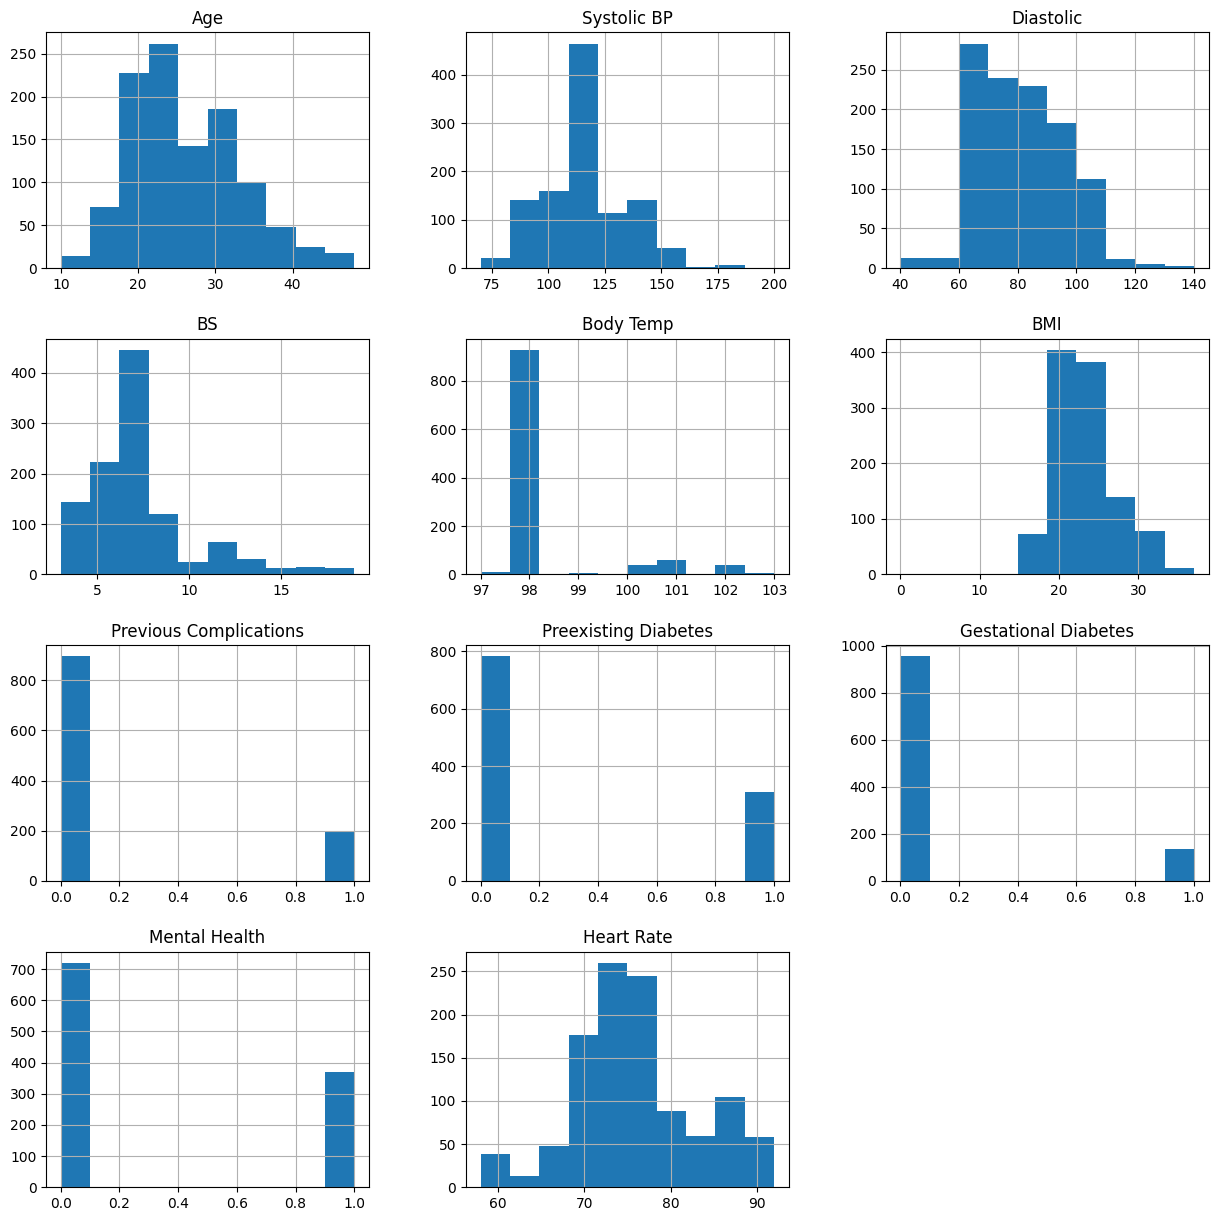

In [ ]:
# Distributions for all columns
df.hist(figsize=(15, 15))
plt.show()

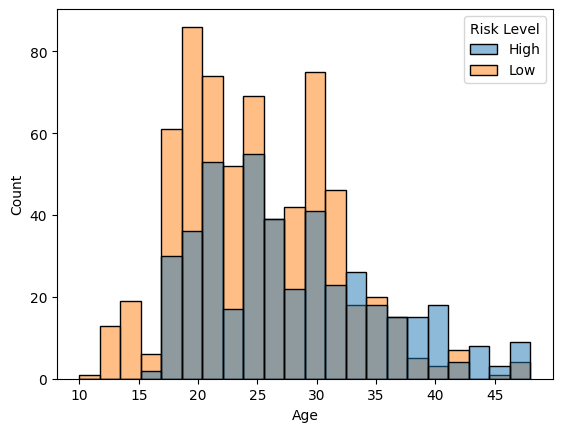

In [ ]:
#Distribution of age against risk level
sns.histplot(x='Age', hue='Risk Level', data=df)
plt.show()

This histogram shows a visualization that shows how the distribution of maternal age relates to the risk level during pregnancy.In this visualization the distribution shows that the pregnancy risk for some ages is high while for some ages its low

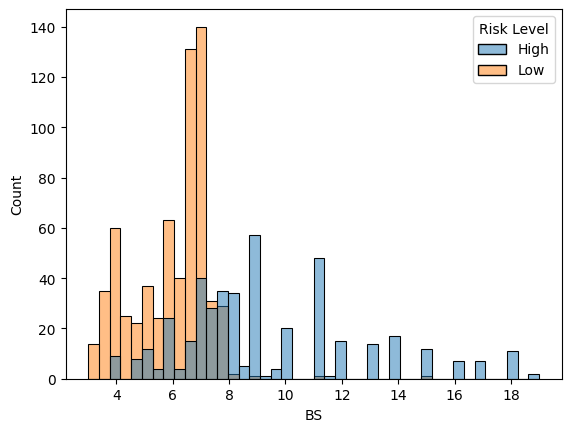

In [ ]:
#Distribution of blood glucose BS against risk level
sns.histplot(x='BS', hue='Risk Level', data=df)
plt.show()

This code creates a visualization to explore that relationship between blood glucose levels (BS) and pregnancy risk levels (Risk Level) in the dataset.Pregnancies are low risk for women within the 0 o 7 ranges

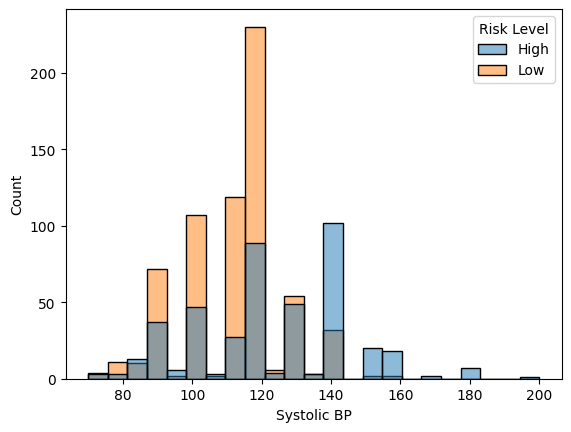

In [ ]:
#Distribution of blood pressure BP against risk level
sns.histplot(x='Systolic BP', hue='Risk Level', data=df)
plt.show()

This code creates a visualization that explores the relationship between Systolic Blood Pressure and Risk Level during pregnancy. Distribution for blood pressure is low for ranges between 80 to 130 and high for 140 to 200  

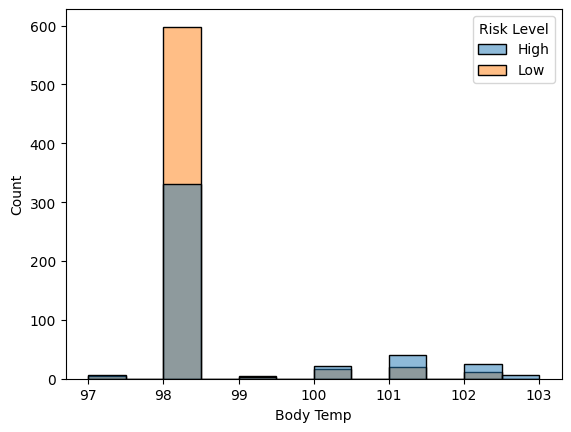

In [ ]:
#Distribution of body temperature against risk level
sns.histplot(x='Body Temp', hue='Risk Level', data=df)
plt.show()

The body temperature  rate is low risk for ranges between 97 to 99 and high risk for ranges between 99 to 103

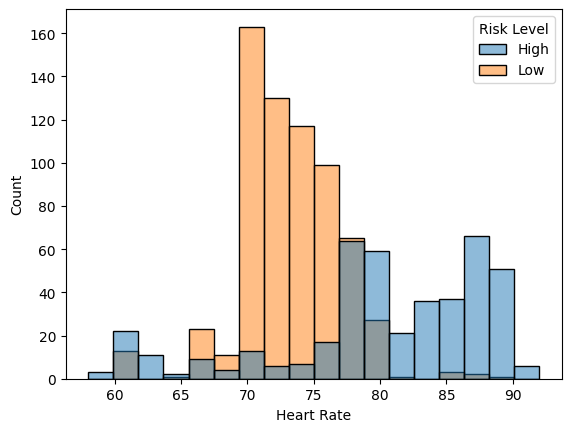

In [ ]:
#Distribution of heart rate against risk level
sns.histplot(x='Heart Rate', hue='Risk Level', data=df)
plt.show()

THe heart rate level for 60 to 65 is high risk but from 65 to 75  is low risk while from 80 to 90 is high risk

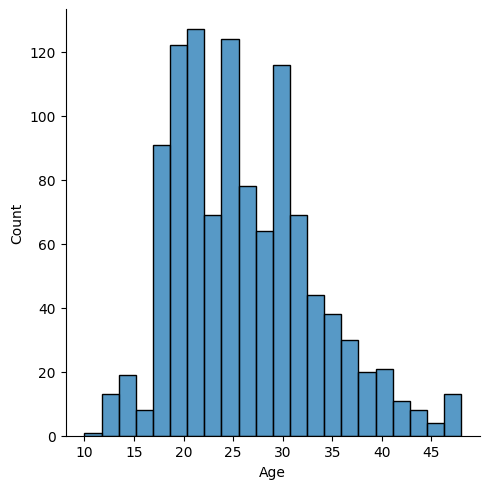

In [ ]:
# plot the skewnes for age
sns.displot(df['Age'])
plt.show()

The skewness shows a right skewed distribution for age this means most people in the data set are relatively young,

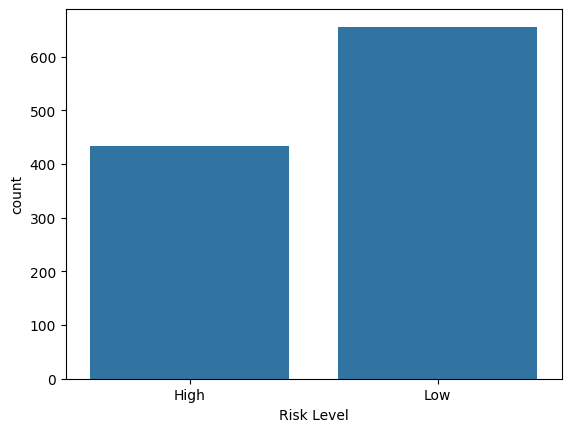

In [ ]:
# visualize the distribution of classes in risk level
sns.countplot(x='Risk Level', data=df)
plt.show()

Observations from visualizations above:

The low risk pregnancies are the most frequent overall, they happen in more than half of the cases.

Younger women tend to have low  risk pregnancies, while the pregnancies of women above 35 y.o. more often are classified as high risk, thus, need more attention.

If a pregnant woman has a blood sugar higher than 8 mmol/L, in most of the cases, the pregnancy is considered high risk.

Distribution of lower value of blood pressure is more spread, around 60-100 mmHg, compared to distribution of upper value, which is centered around 120 mmHg.

Higher blood pressure (both systolic and diastolic), higher body temperature are associated with higher risk pregnancies.

Heart rate of pregnant women is normally distributed and it's only slightly associated with risk level.

The skewness shows a right skewed distribution for age this means most people in the data set are relatively young

In [ ]:
#encoding risk level using  labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Risk Level'] = le.fit_transform(df['Risk Level'])

In [ ]:
# checking if risk level has been encoded
df['Risk Level']

,Risk Level
0,0
1,1
2,1
3,1
4,1
...,...
1200,0
1201,0
1202,0
1203,0


Feature Scaling and Data Splitting

In [ ]:
# let us define our X and y variables
X = df.drop('Risk Level', axis=1)
y = df['Risk Level']

In [ ]:
# let us feature scale the variables to be used
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
# let us check if our X features have been scaled
print(X_scaled[:5])

[[-0.59172141 -1.40280499 -1.17426525  0.59916133  1.47061421 -1.35313474
   2.14236869  1.59341176 -0.37598039  1.39497166  0.57475602]
 [-0.59172141 -0.34423084 -0.48176451 -0.07583343 -0.36554786 -0.73237848
  -0.46677307 -0.62758417 -0.37598039 -0.71686044 -0.2659741 ]
 [ 0.11735548 -0.34423084 -0.48176451  0.06627073 -0.36554786 -0.05989254
   2.14236869 -0.62758417 -0.37598039 -0.71686044 -0.54621747]
 [-0.87535216 -0.87351791 -0.48176451 -0.04030739 -0.36554786 -0.52545973
  -0.46677307 -0.62758417 -0.37598039 -0.71686044 -0.2659741 ]
 [-0.87535216 -1.40280499 -1.17426525  0.06627073 -0.36554786 -0.91343239
  -0.46677307 -0.62758417 -0.37598039 -0.71686044 -0.2659741 ]]


In [ ]:
# Calculate the mean and standard deviation of the scaled data
print(X_scaled.mean(axis=0))  # Should be close to 0 for all features
print(X_scaled.std(axis=0))   # Should be close to 1 for all features

[ 2.24896554e-16 -1.43412295e-16 -1.69487258e-16 -6.19280366e-17
 -3.66353227e-15  2.60749628e-17  1.04299851e-16 -5.21499256e-17
 -7.82248883e-17  0.00000000e+00 -5.60611700e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


By examining the scaled values, their means, and standard deviations, We can ensure that the feature scaling has been applied correctly before proceeding with model training

In [ ]:
# let us split our data in train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# checking if our data has been splitted
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(872, 11)
(218, 11)
(872,)
(218,)


Model Building,Model Prediction and Evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Let us check our accuracy
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9908256880733946


In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)


F1 Score: 0.9908256880733946


In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

Precision: 0.9908256880733946


In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

Recall: 0.9908256880733946


In [ ]:
# using confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 83   1]
 [  1 133]]


We have a 2X2 matrices where there are true positives and false positives. 83 represents instances where Low risk pregnancies were  correctly predicted as low risk and 1 represents instances where the pregnancy  which were Low risk incorrectly predicted as high risk) 1 represents False negatives thus, representing instances  in which pregnancy  were High risk but incorrectly predicted as low risk)  Then we have True Positives  which is 133 thus represnting instances in which High risk correctly predicted as high risk

True Positives (TP): 133 (High risk correctly predicted as high risk)
True Negatives (TN): 83 (Low risk correctly predicted as low risk)
False Positives (FP): 1 (Low risk incorrectly predicted as high risk)
False Negatives (FN): 1 (High risk incorrectly predicted as low risk)
Summary:
High Risk (Positive Class): 133 true positives, 1 false negative
Low Risk (Negative Class): 83 true negatives, 1 false positive
Risk Level:
The model performs well, with very few misclassifications (1 FP and 1 FN). Overall, it indicates a reliable classification between high and low maternity risk levels